# 전세계 음주 데이터 분석하기

# <1. 탐색> 데이터의 기초 정보 살펴보기

### [drinks 데이터셋의 기본 정보]

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '수업자료/drinks.csv'
drinks = pd.read_csv(file_path)
# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [4]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [6]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


-----

# <2. 탐색과 시각화 >

### [피처간의 상관관계 탐색]

##### [두 피처간의 상관계수 구하기]

- 여러 개의 피처들의 서로간의 상관계수를 구하기 앞서, 두 피처간의 상관계수를 구하는 연습을 해봅니다.

In [10]:
# 'beer_servings', 'wine_servings' 두 피처간의 상관계수를 계산

beer = drinks['beer_servings']
wine = drinks['wine_servings']

corr =beer.corr(wine,method='pearson')
corr

0.5271716935065213

In [12]:
corr = drinks[['beer_servings',  'wine_servings']].corr(method='pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


##### [여러 피처의 상관관계 분석]

In [13]:
# 피처간의 상관계수 행렬
drinks.corr()

C:\Users\LG\AppData\Local\Temp\ipykernel_25136\1242574628.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  drinks.corr()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [14]:
# 피처간의 상관계수 행렬
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


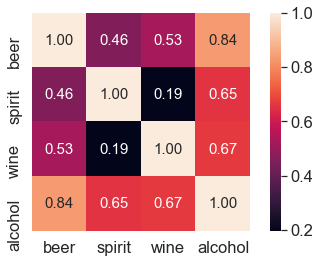

In [8]:
import seaborn as sns

# corr 행렬 히트맵을 시각화합니다.
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()



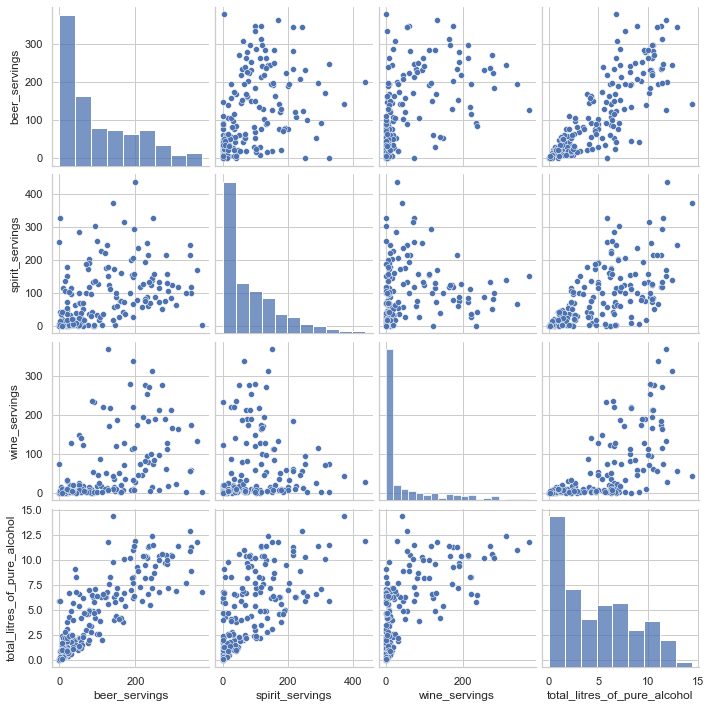

In [9]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

# <3. 탐색적 분석> 

### [결측 데이터 전처리]
- continent column에 대한 결측 데이터 처리 과정

In [2]:
# 대륙에 23개의 nan값이 있음

drinks.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [3]:
# nan을 other 기타대륙으로 분리하기

drinks['continent'] = drinks['continent'].fillna('OT')
drinks[:10]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [37]:
drinks.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

-----

##### 파이차트 시각화

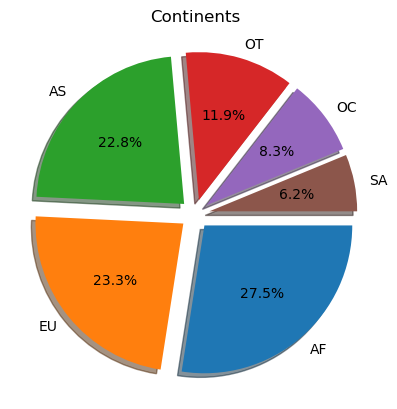

In [61]:
# 대륙별 나라 분포

continent_pie = drinks['continent'].value_counts()
labels = continent_pie.index.tolist()
ratio = continent_pie.values.tolist()
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

plt.pie(ratio, labels = labels, autopct='%.1f%%',explode=explode, shadow =  True, counterclock=False)
plt.title('Continents')
plt.show()

### [그룹 단위의 데이터 분석 : 대륙별 분석]
##### apply, agg 함수를 이용한 대륙별 분석

In [62]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산합니다.
drinks.groupby('continent')['spirit_servings'].agg(['mean','min','max','sum'])

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [66]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구합니다.

total_mean = drinks['total_litres_of_pure_alcohol'].mean()
total_mean

4.717098445595855

In [69]:
total_mean_grouped = drinks.groupby('continent')[['total_litres_of_pure_alcohol']].agg('mean')
total_mean_grouped

,total_litres_of_pure_alcohol
continent,
AF,3.007547
AS,2.170455
EU,8.617778
OC,3.381250
OT,5.995652
SA,6.308333


In [70]:
total_mean_grouped[total_mean_grouped['total_litres_of_pure_alcohol']>total_mean]

,total_litres_of_pure_alcohol
continent,
EU,8.617778
OT,5.995652
SA,6.308333


In [75]:
# 평균 beer_servings이 가장 높은 대륙을 구합니다.
beer_mean = drinks.groupby('continent')['beer_servings'].mean()
beer_mean.idxmax()

'EU'

##### 분석 결과에 대한 시각화

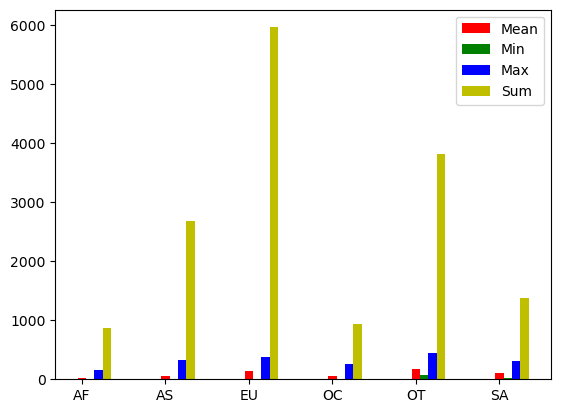

In [80]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

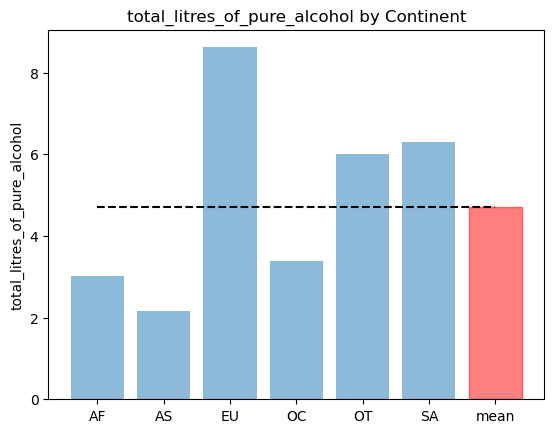

In [79]:
# 대륙별 total_litres_of_pure_alcohol을 시각화합니다.
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

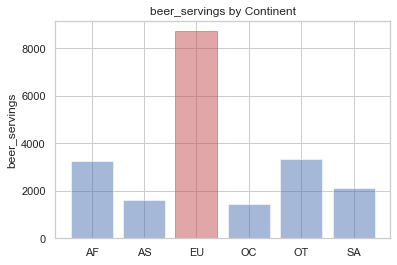

In [22]:
# 대륙별 beer_servings을 시각화합니다.
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

-----

[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 165.7391304347826, 114.75]
[0, 0, 0, 0, 68, 25]
[152, 326, 373, 254, 438, 302]
[866, 2677, 5965, 935, 3812, 1377]


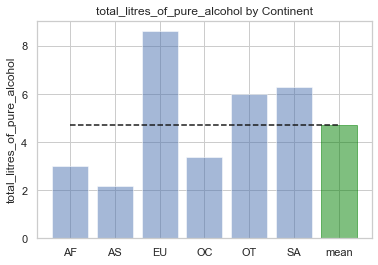

In [24]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 그래프 색상을 변경합니다.


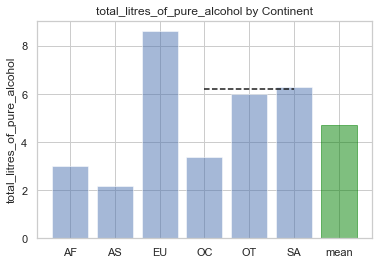

In [25]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 점선을 변경합니다.


-----

# <4. 통계적 분석> : 분석 대상간의 통계적 차이 검정하기

### [아프리카와 유럽간의 맥주 소비량 차이 검정하기]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
    - (env_name) `pip install scipy`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [82]:
!pip install scipy

In [87]:
# 아프리카와 유럽간의 맥주 소비량 차이를 검정합니다.
print(f"아프리카 맥주 소비량 : {beer_mean.loc['AF']}")
print(f"유럽 맥주 소비량 : {beer_mean.loc['EU']}")

아프리카 맥주 소비량 : 61.471698113207545
유럽 맥주 소비량 : 193.77777777777777


# 대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [107]:
# total_servings 피처를 생성
drinks['total_servings'] = drinks['beer_servings']+drinks['spirit_servings']+drinks['wine_servings']
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [110]:
# 술 소비량 대비 알콜 비율 피처를 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks = drinks.fillna(0) # nan은 0으로 매꾸기
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alchol_rate,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495,0.018495
...,...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455,0.045455


In [112]:
# 순위 정보를 생성
country_with_rank = drinks[['country','alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by='alcohol_rate', ascending=False)
country_with_rank

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
...,...,...
103,Maldives,0.000000
97,Libya,0.000000
79,Iran,0.000000
90,Kuwait,0.000000


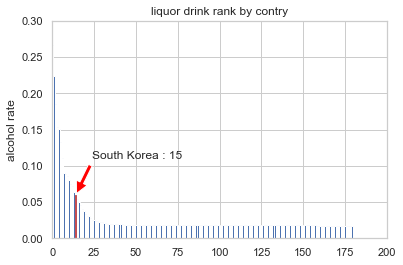

In [29]:
# 국가별 순위 정보를 그래프로 시각화합니다.
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

annotate() 함수는 특정 점에 주석을 추가하고 화살표를 설정하는 데 사용됩니다. 주어진 코드에서는 "South Korea" 국가의 순위와 알코올 소비율을 강조하기 위해 화살표를 추가하고 있습니다.

- 여기서 annotate() 함수의 각 매개변수는 다음과 같습니다:
  - text: 주석으로 표시될 텍스트 내용입니다.
  - xy: 주석을 추가할 점의 좌표입니다.
  - xytext: 텍스트가 표시될 위치의 좌표입니다.
  - arrowprops: 화살표 스타일을 설정하는 딕셔너리 매개변수입니다. 여기서 facecolor는 화살표 색상을 설정하고, shrink는 화살표의 크기를 조절합니다.

-----

# 실습
- total_servings : beer_servings, spirit_servings, wine_servings의 합을 통해 실질적인 소비량을 계산
- alcohol_rate : 소비량 대비 알콜 비율을 계산
- alcohol_rate_rank, alcohol_rate_continent 등으로 응용.

In [114]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '수업자료/drinks.csv'
drinks = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
drinks['continent'] = drinks['continent'].fillna('OT')

-----

### [대륙별 평균 wine_servings 탐색]

In [118]:
wine_mean = drinks.groupby('continent')[['wine_servings']].mean()
wine_mean

,wine_servings
continent,
AF,16.264151
AS,9.068182
EU,142.222222
OC,35.625000
OT,24.521739
SA,62.416667


### [국가별 total_servings 피처 생성]

In [119]:
# total_servings 피처를 생성
drinks['total_servings'] = drinks['beer_servings']+drinks['spirit_servings']+drinks['wine_servings']
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


### [전체 평균보다 적은 알코올을 섭취하는 대륙 중에서, spirit을 가장 많이 마시는 국가 구하기]

In [4]:
# 전체 평균 
total_mean = drinks['total_litres_of_pure_alcohol'].mean()

# 대륙 평균
continent_avg = drinks.groupby('continent')[['total_litres_of_pure_alcohol']].mean()
continent_avg

,total_litres_of_pure_alcohol
continent,
AF,3.007547
AS,2.170455
EU,8.617778
OC,3.381250
OT,5.995652
SA,6.308333


In [6]:
# 전체 평균보다 적은 알코올을 섭취하는 대륙
continent_above_avg = continent_avg[continent_avg['total_litres_of_pure_alcohol']<total_mean]
continent_above_avg

,total_litres_of_pure_alcohol
continent,
AF,3.007547
AS,2.170455
OC,3.381250


In [7]:
# 전체 평균보다 적은 알코올을 섭취하는 대륙 중에서 spirit을 가장 많이 마시는 국가
countries_above_avg = drinks[(drinks['continent']==('AF'))|(drinks['continent']==('AS'))|(drinks['continent']==('OC'))]
result_country = countries_above_avg.sort_values(by='spirit_servings',ascending=False)
result_country['country'].iloc[0]

'Russian Federation'

### [술 소비량 대비 알콜 비율 구하기]

In [120]:
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks = drinks.fillna(0) # nan은 0으로 매꾸기
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


### [대륙별 술 소비량 대비 알콜 비율 구하기]

In [130]:
drinks.groupby('continent')['alcohol_rate'].mean()

continent
AF    0.049741
AS    0.016359
EU    0.017527
OC    0.016895
OT    0.017854
SA    0.017868
Name: alcohol_rate, dtype: float64